In [1]:
# Library imports.
%matplotlib notebook

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
# Load in fault database.
fault_db_path = r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Output\random_fault_flood_link_db_1000.csv"
fault_db = pd.read_csv(fault_db_path)
print(fault_db.head())

   depth_15  depth_16  depth_18  depth_19  depth_20  depth_17   
0  0.530805  0.562234  1.713414  0.499962  0.504033  0.452016  \
1  0.944259  0.946212  6.000000  0.929549  3.048720  1.273635   
2  1.178439  1.191355  6.000000  1.225419  3.048720  1.495816   
3  1.300862  1.360073  6.000000  1.421294  3.048720  1.669878   
4  2.475324  2.426047  6.000000  2.647883  3.048720  2.579027   

              datetime  flood_15  flood_16    flood_18  ...      flow_3   
0  2017-01-01 00:15:00       0.0       0.0    0.000000  ...    7.577689  \
1  2017-01-01 00:30:00       0.0       0.0   52.708656  ...   62.723373   
2  2017-01-01 00:45:00       0.0       0.0  108.803780  ...   85.952003   
3  2017-01-01 01:00:00       0.0       0.0  147.605743  ...  106.219551   
4  2017-01-01 01:15:00       0.0       0.0  450.161560  ...  232.406586   

       flow_4      flow_5      prcp  Experiment  L1_diam  L2_diam  L3_diam   
0    7.235551    3.980963  0.607319         E_0    3.292    3.049    4.997  \
1 

<IPython.core.display.Javascript object>


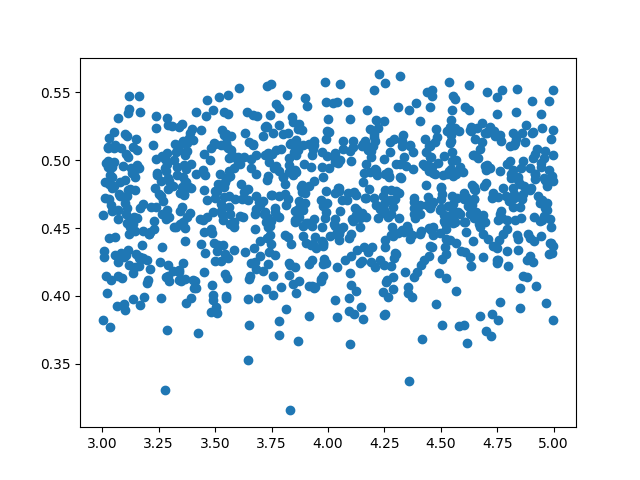

<IPython.core.display.Javascript object>


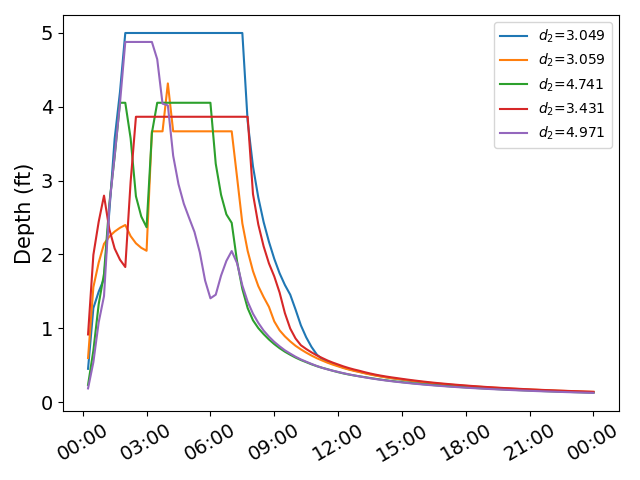

In [8]:
# Group by experiment.
group_db = fault_db.groupby(by='Experiment')

# Plot against max value.
group_cols = [col for col in fault_db.columns if col not in ['datetime', 'Experiment']]
datetimes = pd.to_datetime(fault_db.loc[fault_db['Experiment'] == 'E_10', 'datetime'])
group_col_db = group_db[group_cols]
group_db_median = group_col_db.median()
group_db_max = group_col_db.max()
group_db_sum = group_col_db.sum()

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(group_db_max['L5_diam'], group_db_median['depth_17'])
plt.show()

fig, ax = plt.subplots()
i = 1
for name, group in group_col_db:
    diam = np.max(group['L2_diam'].to_numpy())
    ax.plot(datetimes, group['depth_17'], label=f'$d_2$={diam}')
    
    if i == 5:
        break
    i += 1
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_ylabel('Depth (ft)', fontsize=15)
ax.tick_params(labelsize=14)
ax.tick_params(axis='x', rotation=30)
ax.legend()
fig.tight_layout()
fig.savefig(r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Output\Figures\complex_dynamics.png", dpi=300)

<IPython.core.display.Javascript object>


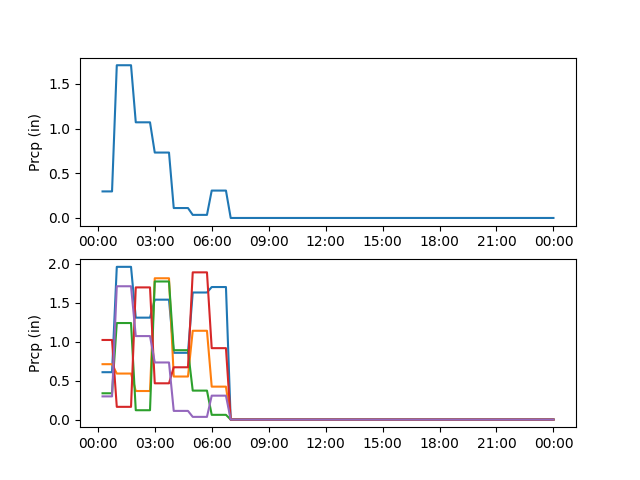

In [32]:
# Plot precipitation.
datetimes = pd.to_datetime(fault_db.loc[fault_db['Experiment'] == 'E_10', 'datetime'])
fig, ax = plt.subplots(2,1)
i = 1
for name, group in group_col_db:
    ax[1].plot(datetimes, group['prcp'])
    
    if i == 5:
        break
    i += 1
    
ax[0].plot(datetimes, group['prcp'])
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax[0].set_ylabel('Prcp (in)')
ax[1].set_ylabel('Prcp (in)')
fig.savefig(r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Output\Figures\prcp_example.png", dpi=300)

<IPython.core.display.Javascript object>


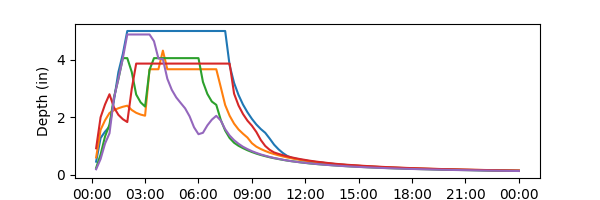

In [36]:
# Plot node depths.
datetimes = pd.to_datetime(fault_db.loc[fault_db['Experiment'] == 'E_10', 'datetime'])
fig, ax = plt.subplots(figsize=(6,2))
i = 1
for name, group in group_col_db:
    ax.plot(datetimes, group['depth_17'])
    
    if i == 5:
        break
    i += 1
    
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_ylabel('Depth (in)')
fig.savefig(r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Output\Figures\node_depth_example.png", dpi=300)

In [9]:
# Scattergraph of depth vs velocity in a pipe.
exp = fault_db.loc[fault_db['Experiment'] == 'E_0', :]

fig, ax = plt.subplots()
ax.plot(exp['flow_5', ])

In [45]:
# Compute histogram of sensitivity.
npair = 1000
checked = []
sensitivity = np.zeros(npair)
for i in range(npair):
    # Select two random rows.
    groups = tuple(np.random.randint(0, 999, 2))
    
    # Ensure rows haven't been used or its not the same row.
    while groups in checked or groups[0] == groups[1]:
        groups = tuple(np.random.randint(0, 999, 2))
        
    # Add to checked.
    checked.append(groups)
    
    # Select the groups.
    g1 = fault_db.loc[fault_db['Experiment'] == f'E_{groups[0]}', group_cols].median()
    g2 = fault_db.loc[fault_db['Experiment'] == f'E_{groups[1]}', group_cols].median()
    
    # Compute the sensitivity.
    xdiff = g1['16_depth'] - g2['16_depth']
    ddiff = g1['L5_diam'] - g2['L5_diam']
    if ddiff > 0.001:
        S = xdiff / ddiff
    else:
        continue
    sensitivity[i] = S
    
    print(i)

0
1
2
3
5
6
9
10
12
13
14
15
17
19
22
25
28
29
30
32
33
37
40
41
43
46
47
49
50
51
52
53
56
57
62
64
68
69
72
73
74
78
79
84
89
90
93
95
96
97
98
99
100
102
104
109
111
113
116
118
119
123
124
125
128
131
133
134
135
137
140
141
144
145
148
149
156
159
161
163
165
170
171
173
174
175
177
178
180
182
183
184
185
187
191
193
194
199
201
203
204
209
210
213
216
218
222
223
225
228
229
230
231
232
234
238
241
242
243
245
247
251
255
256
258
259
265
266
269
272
273
274
275
276
279
281
282
283
286
289
290
291
294
297
300
302
303
306
307
311
313
314
315
317
320
323
324
326
327
328
330
331
338
342
343
344
345
346
347
349
352
353
356
357
362
363
364
365
366
367
369
371
373
374
375
376
377
379
380
381
383
385
388
389
390
391
392
394
397
399
402
407
408
412
413
414
416
418
419
420
421
424
427
428
429
433
435
436
437
439
441
443
444
448
449
450
451
453
460
465
467
471
473
474
479
481
483
485
486
487
492
494
498
500
504
506
507
508
510
511
513
514
516
517
518
520
521
523
528
531
533
534
535
537
541

In [62]:
print(np.median(sensitivity))

0.0
